## Draw methylation level

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
data = pd.read_csv('no_filter_leaf_five_sample_LOS_Os01g41370_ud2k.txt')
data.head(3)

,Pos,Ctx,WT,Normal,Medium,CHD1,CHD2
0,23406625,CHH,0.00,0.0,0.0,0.0,0.0
1,23406626,CHH,0.05,0.0,0.0,0.0,0.0
2,23406627,CHH,0.00,0.0,0.0,0.0,0.0


In [3]:
pic_data = [data[data.Ctx=='CG'],data[data.Ctx=='CHG'],data[data.Ctx=='CHH']]

In [4]:
agene = pd.read_csv('agene.txt')
agene

,Chr,Spos,Epos,Strand,Gene_id,Class,Color
0,Chr1,23408576,23408667,+,LOC_Os01g41370,P5,grey
1,Chr1,23408668,23409727,+,LOC_Os01g41370,CDS,orange
2,Chr1,23410264,23410407,+,LOC_Os01g41370,CDS,orange
3,Chr1,23410514,23410876,+,LOC_Os01g41370,CDS,orange
4,Chr1,23410877,23411100,+,LOC_Os01g41370,P3,grey


In [5]:
matplotlib.rcParams['font.family'] = 'Arial'

In [21]:
### draw a gene model ###
#默认一个子图高度为1.5
axrange = [23406623,23413059]
def draw_gene(ax,agene,arrow_ratio = 50,xrange=axrange,yrange=[0,1]):
    ax.set_ylim(yrange)
    ax.set_xlim(xrange)
    # 设置方向箭头长度
    anno_arrow = (xrange[1] - xrange[0] + 1) / arrow_ratio
    # 获取两个信息；1基因的在图中的最左端位置，为了放置基因名使用；2基因的长度
    if agene.iloc[1]['Strand'] == '+':
        gene_text = agene.loc[agene.Class=='P5','Spos'].values[0]
        gene_len = agene.loc[agene.Class=='P3','Epos'].values[0] - agene.loc[agene.Class=='P5','Spos'].values[0] + 1
    elif agene.iloc[1]['Strand'] == '-':
        gene_text = agene.loc[agene.Class=='P3','Spos'].values[0]
        gene_len = agene.loc[agene.Class=='P5','Epos'].values[0] - agene.loc[agene.Class=='P3','Spos'].values[0] + 1
    #
    intron_region = []
    # 绘制UTR区域和CDS区域
    for i in range(agene.shape[0]):
        spos = int(agene.iloc[i]['Spos'])
        epos = int(agene.iloc[i]['Epos'])
        region_size = epos - spos + 1
        if agene.iloc[i]['Class'] == 'P5' or agene.iloc[i]['Class'] == 'P3':
            rect = plt.Rectangle((spos,0.55),region_size,0.15,color='purple')
            ax.add_patch(rect)
        elif agene.iloc[i]['Class'] == 'CDS':
            rect = plt.Rectangle((spos,0.5),region_size,0.25,color='grey')
            ax.add_patch(rect)
            if agene.iloc[i]['Strand'] == '+':
                if i == 1:
                    intron_region.append(epos+1)
                elif i == (agene.shape[0] - 2):
                    intron_region.append(spos-1)
                else:
                    intron_region.append(spos-1)
                    intron_region.append(epos+1)
            elif agene.iloc[i]['Strand'] == '-':
                if i == 1:
                    intron_region.append(spos-1)
                elif i == (agene.shape[0] - 2):
                    intron_region.append(epos+1)
                else:
                    intron_region.append(epos+1)
                    intron_region.append(spos-1)

    # 内含子用直线表示
    for j in [y for y in range(len(intron_region)) if y %2 ==0]:
        ax.plot([intron_region[j],intron_region[j+1]],[0.625,0.625],color='grey')
    # 在3'UTR末端添加箭头表示5’--> 3‘的方向
    if agene.iloc[i]['Strand'] == '+':
        P3_end = agene.loc[agene.Class == 'P3','Epos']
        ax.annotate("",
                xy=(P3_end + anno_arrow, 0.625), xycoords='data',
                xytext=(P3_end,0.625), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"),
                )
    elif agene.iloc[i]['Strand'] == '-':
        P3_end = agene.loc[agene.Class == 'P3','Spos']
        ax.annotate("",
                xy=(P3_end - anno_arrow, 0.625), xycoords='data',
                xytext=(P3_end+anno_arrow/10,0.625), textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"),
                )   
    # 添加基因名
    ax.text(round(gene_len/5+gene_text,2),0.1,r'$\itLOC\_Os01g41370$',fontsize=30)
    ax.text(23406625,0.6,'6.5kb',fontsize=40)
    ax.text(23411800,0.2,'155bp',fontsize=40)
    # 关闭图形四个边框
    #ax.axis('off')
#draw_gene(ax,agene)
#plt.show()

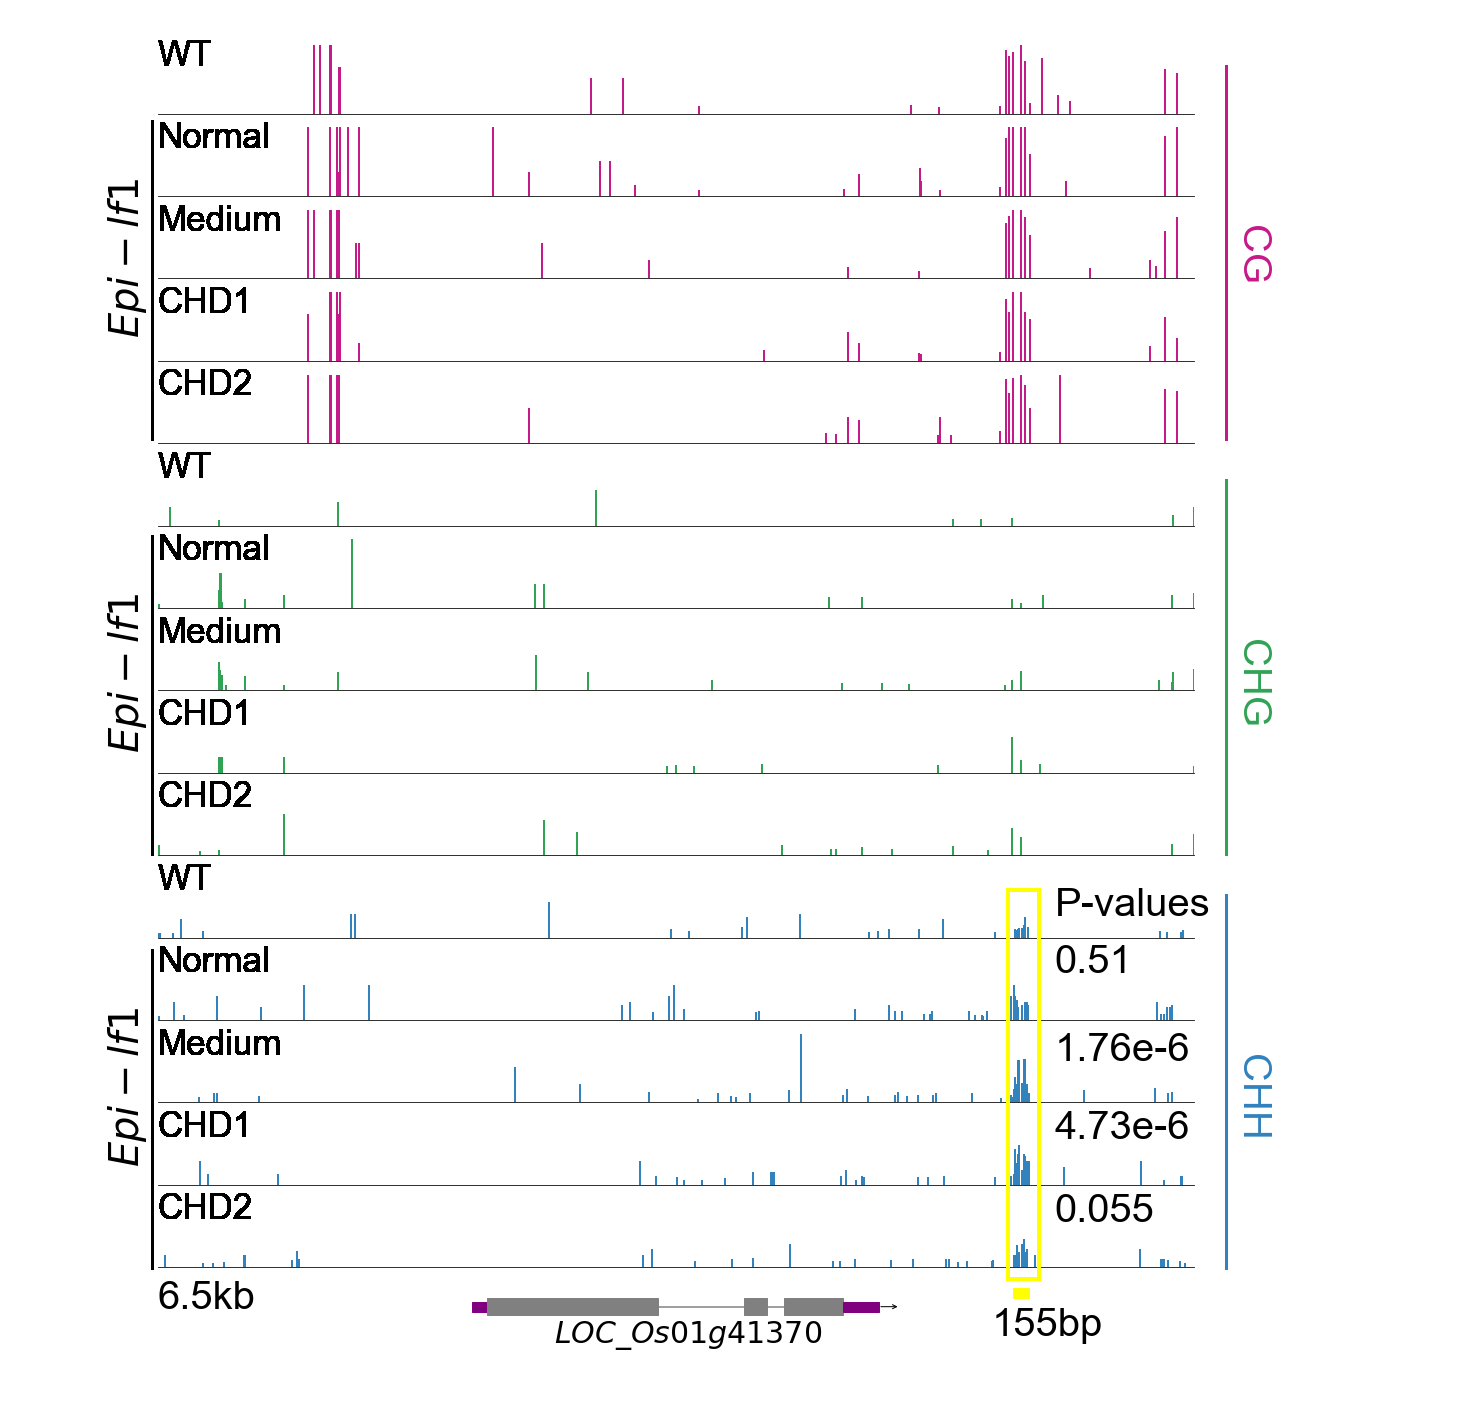

In [24]:
#
samples = data.columns[2:7]
pic_num = 3*len(samples)+1
# left label fontsize
fs_leftlabel = 40
# color
mycolors = ['#c51b8a','#31a354','#3182bd']
#line width
main_lw = 2
# other argv
myylime = [0,1]
myxlime = [23406623,23413059]
pic_width = 18
#
fig,axes = plt.subplots(ncols=1,nrows=pic_num,figsize=[pic_width,pic_num*1.5],sharex=True)
#
k = 0
for j in range(3):
    for i in range(len(samples)):
        for x in range(pic_data[j].shape[0]):
            axes[k].plot([pic_data[j].Pos.iloc[x],pic_data[j].Pos.iloc[x]],[0,pic_data[j][samples[i]].iloc[x]],color=mycolors[j],lw=main_lw)
            #
            axes[k].set_xlim(myxlime)
            axes[k].set_ylim(myylime)
            axes[k].spines['top'].set_visible(False)
            axes[k].spines['right'].set_visible(False)
            axes[k].spines['left'].set_visible(False)
            axes[k].set_xticks([])
            axes[k].set_yticks([])
            axes[k].set_yticklabels([])
            axes[k].text(axrange[0],0.7,samples[i],fontsize=35)
            #
        k += 1
# 最右侧标注绘制
plt.axes([0.9, 0.1, 0.2, 0.8]).axis('off')
plt.xlim([0,1])
plt.ylim([0,1])
#
plt.plot([0.12,0.12],[0.69,0.96],color=mycolors[0],lw=3)
plt.text(0.15,(0.69+0.96)/2,'CG',rotation=-90,fontsize=fs_leftlabel,color=mycolors[0])
#
plt.plot([0.12,0.12],[0.39,0.66],color=mycolors[1],lw=3)
plt.text(0.15,(0.39+0.66)/2,'CHG',rotation=-90,fontsize=fs_leftlabel,color=mycolors[1])
#
plt.plot([0.12,0.12],[0.09,0.36],color=mycolors[2],lw=3)
plt.text(0.15,(0.09+0.36)/2,'CHH',rotation=-90,fontsize=fs_leftlabel,color=mycolors[2])
# 最左侧标注绘制
plt.axes([0, 0.1, 0.2, 0.8]).axis('off')
plt.xlim([0,1])
plt.ylim([0,1])
#
plt.plot([0.48,0.48],[0.69,0.92],lw=3,color='black')
plt.text(0.3,(0.69+0.92)/2+0.05,r'$\itEpi-lf1$',rotation=90,fontsize=fs_leftlabel)
#
plt.plot([0.48,0.48],[0.39,0.62],lw=3,color='black')
plt.text(0.3,(0.39+0.62)/2+0.05,r'$\itEpi-lf1$',rotation=90,fontsize=fs_leftlabel)
#
plt.plot([0.48,0.48],[0.09,0.32],lw=3,color='black')
plt.text(0.3,(0.09+0.32)/2+0.05,r'$\itEpi-lf1$',rotation=90,fontsize=fs_leftlabel)
# 绘制基因模式图
draw_gene(axes[pic_num-1],agene,xrange=myxlime)
axes[pic_num-1].axis('off')
# mCHH island 标注
spos_mCHH_island = 23411933
mCHH_island_size = 100
arect = plt.Rectangle((spos_mCHH_island,0.75),mCHH_island_size,0.15,color='yellow')
axes[pic_num-1].add_patch(arect)
#
square_ax = plt.axes([0.75, 0.16, 0.1, 0.3])
plt.xlim([0,1])
plt.ylim([0,1])
brect = plt.Rectangle((0.06,0.02),0.24,0.75,color='yellow',fill=False,lw=4)
square_ax.add_patch(brect)
square_ax.text(0.42,0.72,'P-values',fontsize=40)
square_ax.text(0.42,0.61,'0.51',fontsize=40)
square_ax.text(0.42,0.44,'1.76e-6',fontsize=40)
square_ax.text(0.42,0.29,'4.73e-6',fontsize=40)
square_ax.text(0.42,0.13,'0.055',fontsize=40)
square_ax.axis('off')
#
plt.subplots_adjust(left=0.1,right=0.9)
plt.savefig('change_color_no_filter_2018_6_26.pdf',dpi=300,bbox_inches='tight')
plt.show()